# Legge di Snell sulla rifrazione luminosa

*Sulla base della lettura di un file CSV, esegue una linearizzazione delle ascisse e delle ordinate e quindi calcola i coefficienti della retta di regressione, le incertezze dei parametri e il coefficiente di correlazione utilizzando la funzione `linregress` del pacchetto SciPy.
Visualizza i risultati in tre grafici a dispersione: il primo comprendente i dati, il secondo i residui e il terzo con la funzione originaria.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
nome_file = input("Inserire il nome del file CSV: ")
file_in = open(nome_file, "r")
coppie_dati = np.loadtxt(file_in, delimiter = ",", comments = '#', usecols = (0,1))

I valori letti dal file, essendo in gradi, vengono riportati ai radianti e quindi se ne calcola il seno linearizzando la relazione. Quindi viene utilizzata la funzione `linregress()` della libreria SciPy. Riportati i risultati nella tuple `esiti` dalla quale vengono estratti gli elementi `slope` e `intercept`.

In [3]:
n = len(coppie_dati)

nparrayX_Y = coppie_dati.transpose()
dati_x = np.sin(np.pi*nparrayX_Y[0]/180)
dati_y = np.sin(np.pi*nparrayX_Y[1]/180)
file_in.close()

esiti = linregress(dati_x,dati_y)

a = esiti.slope
b = esiti.intercept

Qui si estraggono le stime delle deviazioni standard e il coefficiente di correlazione.

In [4]:
previsioni_y = a*dati_x + b
residui = dati_y - previsioni_y

sigma = np.std(residui, ddof=2)
sigma_a = esiti.stderr
sigma_b = esiti.intercept_stderr
coeff_correlazione = esiti.rvalue

In [5]:
min_x = min(dati_x)
max_x = max(dati_x)
min_y = min(dati_y)
max_y = max(dati_y)
delta_x = (max_x-min_x)/15
delta_y = (max_y-min_y)/15

Si costruiscono le rette che individuano la fascia di incertezza. 

In [6]:
x = np.linspace(min_x-delta_x, max_x+delta_x, 100)
y = a*x + b
y_sup = (a+sigma_a)*x + (b+sigma_b)
y_inf = (a-sigma_a)*x + (b-sigma_b)

In [7]:
massimo_residui = max(abs(residui))

if a>=0:
    posizione_txt = max_x - 4*delta_x
elif a<0:
    posizione_txt = min_x + delta_x 

Primo grafico: dispersione dei dati, retta di regressione e fascia di incertezza.

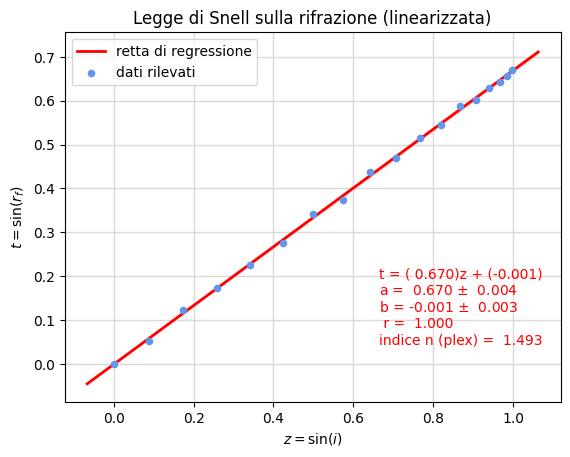

In [8]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.vlines(dati_x, dati_y-sigma, dati_y+sigma, linewidth = .5, color = 'b')
plt.fill_between(x, y_inf, y_sup, alpha = .1, linewidth = 0, color='r')
plt.plot(x, y, color = 'red', linewidth = 2, label = 'retta di regressione')
plt.scatter(dati_x, dati_y, s = 20, c = 'cornflowerblue', zorder = 3, label = 'dati rilevati')
plt.title("Legge di Snell sulla rifrazione (linearizzata)")
plt.xlabel('$z=\sin(i)$')
plt.ylabel('$t=\sin(r_f)$')
plt.text(posizione_txt-delta_x, delta_y, 't = ({0:6.3f})z + ({1:6.3f})\na = {0:6.3f} $\pm$ {2:6.3f}\nb = {1:6.3f} $\pm$ {3:6.3f}\n r = {4:6.3f}\nindice n (plex) = {5:6.3f}'.format(a, b, sigma_a, sigma_b, coeff_correlazione, 1/a), c = 'r')
plt.legend()
plt.show()

Distribuzione dei residui e relativa deviazione standard.

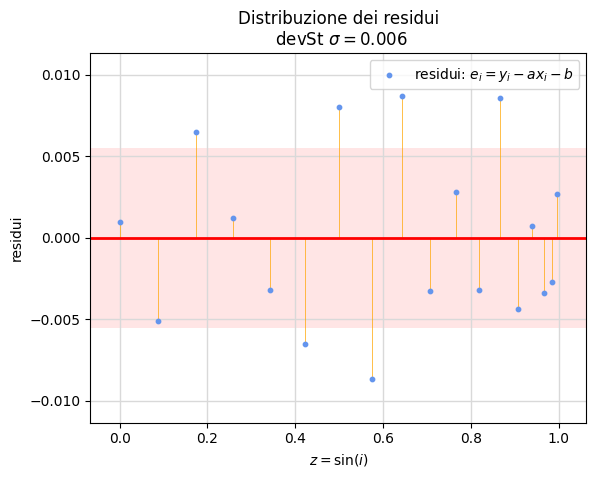

In [9]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.xlim([min_x-delta_x, max_x+delta_x])
plt.ylim([-13/10*massimo_residui, 13/10*massimo_residui])
plt.vlines(dati_x, np.zeros(n), residui, linewidth = .5, color = 'orange')
plt.fill_between(x, -sigma, sigma, alpha =.1, linewidth = 0, color = 'r')
plt.plot(x,np.zeros(100), color = 'red', linewidth = 2)
plt.scatter(dati_x, residui, s = 10, c = 'cornflowerblue', zorder = 3, label = 'residui: $e_i=y_i-ax_i-b$')
plt.title("Distribuzione dei residui\n devSt $\sigma=$" + str(round(sigma,3)))
plt.xlabel('$z=\sin(i)$')
plt.ylabel('residui')
plt.legend()
plt.show()

Definiti gli angoli di incidenza in radianti e in gradi, si calcolano in corrispondenza le ordinate dei punti appartenenti alla funzione $r=\arcsin[\sin(i)/n]$ con l'indice di rifrazione $n=1/\hat a$.

In [10]:
incRad = np.linspace(0, np.pi/2, 100)
inc = (180/np.pi)*incRad
rif = (180/np.pi)*np.arcsin(np.sin(incRad)*a)

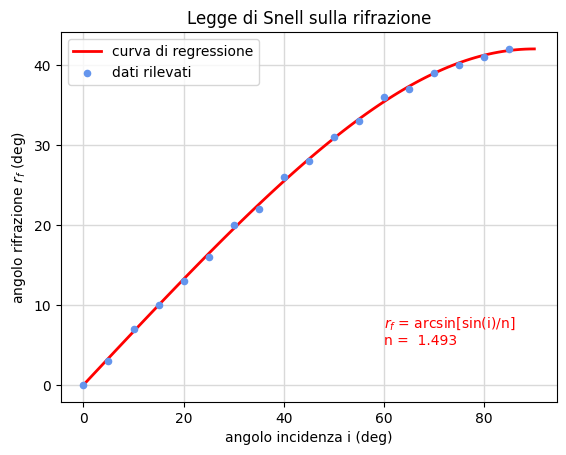

In [11]:
plt.grid(which = 'both', color = '.85', linestyle = '-', linewidth=1)
plt.plot(inc, rif, color = 'red', linewidth = 2, label = 'curva di regressione')
plt.scatter(nparrayX_Y[0], nparrayX_Y[1], s = 20, c = 'cornflowerblue', zorder = 3, label = 'dati rilevati')
plt.title("Legge di Snell sulla rifrazione")
plt.xlabel('angolo incidenza i (deg)')
plt.ylabel('angolo rifrazione $r_f$ (deg)')
plt.text(60, 5, '$r_f$'+' = arcsin[sin(i)/n]'+'\nn = {0:6.3f}'.format(1/a), c = 'r')
plt.legend()
plt.show()